## Project Objective: Forecasting Next 30 Days of Change in Return Percentage

#### The primary objective of this Jupyter notebook is to conduct predictive modeling for financial analysis. Specifically, our aim is to extract relevant data from the provided dataset, preprocess it, and utilize machine learning techniques to train predictive models. The goal is to try to forecast the change in return percentage for the next 30 days. This project endeavors to provide insights for informed decision-making in financial markets.

#### This code fetches historical stock data for AMD, Intel, and Nvidia, creates a portfolio DataFrame, calculates its value and daily percentage change, filters it for market open dates, and rounds values for consistency before displaying the data.

In [23]:
import pandas as pd
import yfinance as yf
from pandas_market_calendars import get_calendar
from pandas.tseries.offsets import CustomBusinessDay

# Define the symbols for Nvidia, Intel, and AMD
symbols = ['AMD', 'INTC', 'NVDA']

# Calculate the end date as today
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

# Calculate the start date as 10 years before the end date
start_date = (pd.Timestamp.today() - pd.DateOffset(years=5)).strftime('%Y-%m-%d')

# Fetch historical stock data
stock_data = yf.download(symbols, start=start_date, end=end_date)['Adj Close']

# Create a DataFrame for the portfolio
portfolio_df = pd.DataFrame(stock_data)

# Rename columns to include stock symbols
portfolio_df.columns = symbols

# Add a column for the number of shares (1000 shares for each stock)
portfolio_df['Shares_AMD'] = 1000
portfolio_df['Shares_INTC'] = 1000
portfolio_df['Shares_NVDA'] = 1000

# Calculate the value of the portfolio in USD
portfolio_df['Portfolio_Value'] = (portfolio_df['AMD'] * portfolio_df['Shares_AMD'] +
                                   portfolio_df['INTC'] * portfolio_df['Shares_INTC'] +
                                   portfolio_df['NVDA'] * portfolio_df['Shares_NVDA'])

# Calculate the portfolio unit price in USD
portfolio_df['Portfolio_Close_Price'] = ((portfolio_df['AMD'] * portfolio_df['Shares_AMD'] +
                                       portfolio_df['INTC'] * portfolio_df['Shares_INTC'] +
                                       portfolio_df['NVDA'] * portfolio_df['Shares_NVDA']))/3000

# Calculate daily percentage change in portfolio value
portfolio_df['Daily_Return_Percentage'] = portfolio_df['Portfolio_Close_Price'].pct_change() * 100

# Drop NaN values resulting from the calculation
portfolio_df.dropna(inplace=True)

# Define a custom business day object for Monday to Friday
monday_to_friday_bday = CustomBusinessDay(weekmask='Mon Tue Wed Thu Fri')

# Generate a date range using the custom business day object
market_open_dates = pd.date_range(start=start_date, end=end_date, freq=monday_to_friday_bday)

# Filter the data to include only market open dates
portfolio_df = portfolio_df[portfolio_df.index.isin(market_open_dates)]

# Round the portfolio value columns to 2 decimal places
portfolio_df = portfolio_df.round({'AMD': 2, 'INTC': 2, 'NVDA': 2, 'Portfolio_Value': 2, 'Portfolio_Close_Price': 2})

# Print the first few rows of the portfolio DataFrame
display(portfolio_df.head())
display(portfolio_df.tail())



[*********************100%%**********************]  3 of 3 completed


,AMD,INTC,NVDA,Shares_AMD,Shares_INTC,Shares_NVDA,Portfolio_Value,Portfolio_Close_Price,Daily_Return_Percentage
Date,,,,,,,,,
2019-04-03,29.02,48.55,46.83,1000,1000,1000,124405.88,41.47,3.879072
2019-04-04,29.09,48.94,46.75,1000,1000,1000,124771.54,41.59,0.293923
2019-04-05,28.98,48.66,47.41,1000,1000,1000,125049.43,41.68,0.222722
2019-04-08,28.53,48.73,47.62,1000,1000,1000,124878.03,41.63,-0.137069
2019-04-09,27.24,48.41,46.99,1000,1000,1000,122644.77,40.88,-1.788351


,AMD,INTC,NVDA,Shares_AMD,Shares_INTC,Shares_NVDA,Portfolio_Value,Portfolio_Close_Price,Daily_Return_Percentage
Date,,,,,,,,,
2024-03-25,178.63,41.83,950.02,1000,1000,1000,1170480.03,390.16,0.460902
2024-03-26,177.87,41.99,925.61,1000,1000,1000,1145469.98,381.82,-2.136734
2024-03-27,179.59,43.77,902.50,1000,1000,1000,1125860.00,375.29,-1.711960
2024-03-28,180.49,44.17,903.56,1000,1000,1000,1128220.00,376.07,0.209618
2024-04-01,183.34,44.52,903.63,1000,1000,1000,1131490.00,377.16,0.289837


#### In this code, we utilize Matplotlib to plot the performance of our portfolio over the last five years. We plot the portfolio unit price against the date, showcasing how the value of our portfolio has evolved over time. The resulting graph provides a visual representation of our portfolio's performance, aiding in analysis and decision-making. We then created a JPEG of the plot.

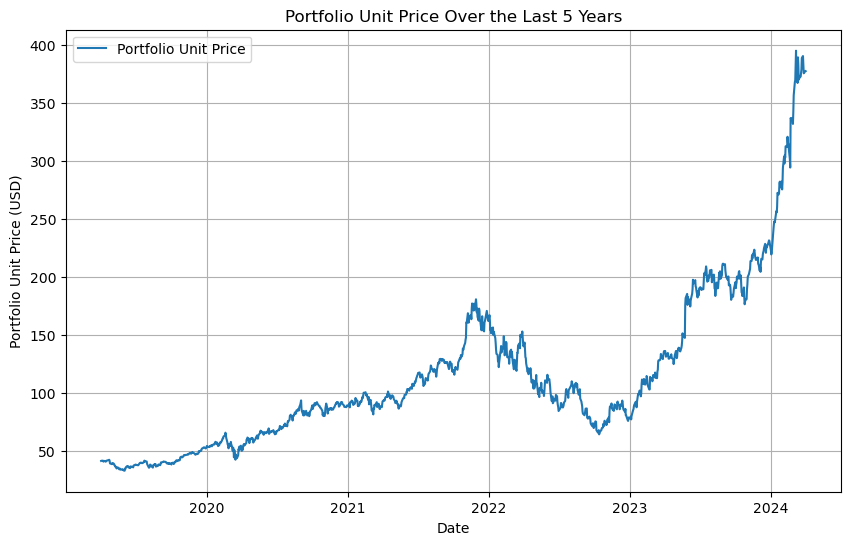

In [2]:
import matplotlib.pyplot as plt

# Plot the portfolio value for the last 5 years
plt.figure(figsize=(10, 6))
plt.plot(portfolio_df.index, portfolio_df['Portfolio_Close_Price'], label='Portfolio Unit Price')
plt.title('Portfolio Unit Price Over the Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Portfolio Unit Price (USD)')
plt.legend()
plt.grid(True)

# Save the plot as a JPEG file
plt.savefig('portfolio_unit_price.jpeg', dpi=300, bbox_inches='tight')

plt.show()

#### In this segment, we calculate the daily percentage change in the portfolio value and visualize it over the last five years. By computing the percentage change in the portfolio's unit price on a daily basis, we gain insights into the volatility and trends of our portfolio's performance. The resulting plot provides a clear depiction of the daily fluctuations in our portfolio's value, aiding in risk assessment and investment strategy evaluation. We then created a JPEG of the plot.

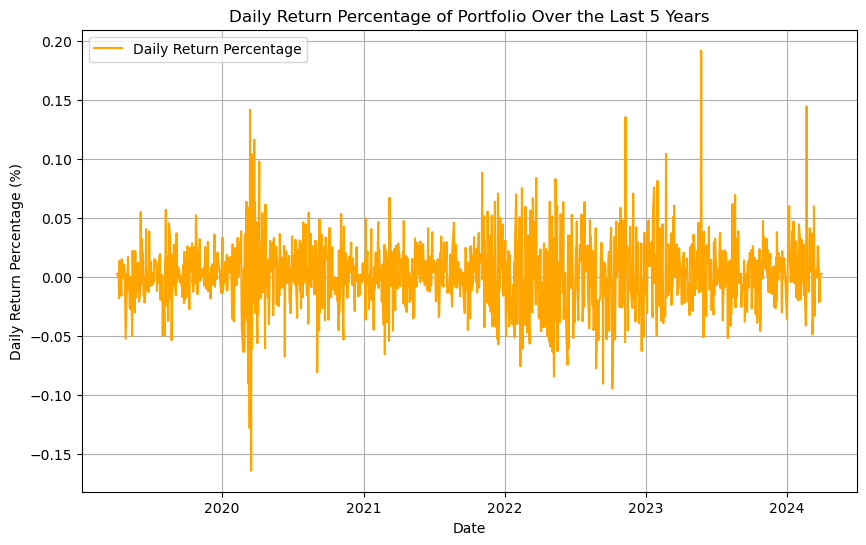

In [3]:
# Calculate daily percentage change in portfolio value
portfolio_df['Daily_Return_Percentage'] = portfolio_df['Portfolio_Close_Price'].pct_change()

# Plot the daily return percentage for the last 5 years
plt.figure(figsize=(10, 6))
plt.plot(portfolio_df.index, portfolio_df['Daily_Return_Percentage'], label='Daily Return Percentage', color='orange')
plt.title('Daily Return Percentage of Portfolio Over the Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Daily Return Percentage (%)')
plt.legend()
plt.grid(True)

# Save the plot as a JPEG file
plt.savefig('portfolio_daily_return_pct.jpeg', dpi=300, bbox_inches='tight')

plt.show()

#### Here, we compute the daily percentage change in the portfolio's close price and drop any resulting NaN values. This calculation allows us to assess the daily fluctuations in the portfolio's value with respect to its close price. By eliminating NaN values, we ensure consistency in our data for further analysis and interpretation. Below are the first few rows of the updated portfolio DataFrame, reflecting the calculated daily percentage change in the portfolio's close price.

In [24]:
# Calculate daily percentage change in portfolio_close_price
portfolio_df['Daily_Return_Close_Price_Percentage'] = portfolio_df['Portfolio_Close_Price'].pct_change() * 100

# Drop NaN values resulting from the calculation
portfolio_df.dropna(inplace=True)

portfolio_df.reset_index(inplace=True)

# Print the latest few rows of the portfolio DataFrame
portfolio_df.tail()

,Date,AMD,INTC,NVDA,Shares_AMD,Shares_INTC,Shares_NVDA,Portfolio_Value,Portfolio_Close_Price,Daily_Return_Percentage,Daily_Return_Close_Price_Percentage
1251,2024-03-25,178.63,41.83,950.02,1000,1000,1000,1170480.03,390.16,0.460902,0.460901
1252,2024-03-26,177.87,41.99,925.61,1000,1000,1000,1145469.98,381.82,-2.136734,-2.137585
1253,2024-03-27,179.59,43.77,902.50,1000,1000,1000,1125860.00,375.29,-1.711960,-1.710230
1254,2024-03-28,180.49,44.17,903.56,1000,1000,1000,1128220.00,376.07,0.209618,0.207839
1255,2024-04-01,183.34,44.52,903.63,1000,1000,1000,1131490.00,377.16,0.289837,0.289840


#### This code segment utilizes the tsfresh library to extract features from a time-series dataset stored in portfolio_df, where each row corresponds to a timestamp indexed by 'Date'. The extracted features are displayed, following a reset of the index to ensure unique identifiers for each timestamp.

#### TSFresh is a Python library used for automatic feature extraction from time series data. It generates a wide range of features suitable for machine learning tasks, enabling efficient analysis and modeling of time series datasets.

In [9]:
from tsfresh import extract_features

# Reset index to have a unique identifier for each timestamp
portfolio_df.reset_index(inplace=True)

# Extract features
extracted_features = extract_features(portfolio_df, column_id='Date')

# Print the extracted features
display(extracted_features.tail())

Feature Extraction:   0%|          | 0/20 [00:00<?, ?it/s]

Feature Extraction: 100%|██████████| 20/20 [02:47<00:00,  8.35s/it]


,Daily_Return_Percentage__variance_larger_than_standard_deviation,Daily_Return_Percentage__has_duplicate_max,Daily_Return_Percentage__has_duplicate_min,Daily_Return_Percentage__has_duplicate,Daily_Return_Percentage__sum_values,Daily_Return_Percentage__abs_energy,Daily_Return_Percentage__mean_abs_change,Daily_Return_Percentage__mean_change,Daily_Return_Percentage__mean_second_derivative_central,Daily_Return_Percentage__median,...,Portfolio_Close_Price__fourier_entropy__bins_5,Portfolio_Close_Price__fourier_entropy__bins_10,Portfolio_Close_Price__fourier_entropy__bins_100,Portfolio_Close_Price__permutation_entropy__dimension_3__tau_1,Portfolio_Close_Price__permutation_entropy__dimension_4__tau_1,Portfolio_Close_Price__permutation_entropy__dimension_5__tau_1,Portfolio_Close_Price__permutation_entropy__dimension_6__tau_1,Portfolio_Close_Price__permutation_entropy__dimension_7__tau_1,Portfolio_Close_Price__query_similarity_count__query_None__threshold_0.0,Portfolio_Close_Price__mean_n_absolute_max__number_of_maxima_7
2024-03-25,0.0,0.0,0.0,0.0,0.004609,0.000021,NaN,NaN,NaN,0.004609,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-26,0.0,0.0,0.0,0.0,-0.021376,0.000457,NaN,NaN,NaN,-0.021376,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-27,0.0,0.0,0.0,0.0,-0.017102,0.000292,NaN,NaN,NaN,-0.017102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-28,0.0,0.0,0.0,0.0,0.002078,0.000004,NaN,NaN,NaN,0.002078,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-01,0.0,0.0,0.0,0.0,0.002898,0.000008,NaN,NaN,NaN,0.002898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### In this code segment, null values are removed from the extracted features dataset (extracted_features) along columns. Subsequently, columns with zero variance are filtered out, ensuring that only informative features remain in the dataset, which is then displayed.

In [10]:
# Remove columns with null values
extracted_features = extracted_features.dropna(axis=1)

# Remove columns with zero variance
extracted_features = extracted_features.loc[:, extracted_features.std() > 0]

extracted_features.tail()

,Daily_Return_Percentage__sum_values,Daily_Return_Percentage__abs_energy,Daily_Return_Percentage__median,Daily_Return_Percentage__mean,Daily_Return_Percentage__root_mean_square,Daily_Return_Percentage__maximum,Daily_Return_Percentage__absolute_maximum,Daily_Return_Percentage__minimum,Daily_Return_Percentage__quantile__q_0.1,Daily_Return_Percentage__quantile__q_0.2,...,Portfolio_Close_Price__quantile__q_0.6,Portfolio_Close_Price__quantile__q_0.7,Portfolio_Close_Price__quantile__q_0.8,Portfolio_Close_Price__quantile__q_0.9,"Portfolio_Close_Price__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)","Portfolio_Close_Price__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)","Portfolio_Close_Price__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","Portfolio_Close_Price__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)","Portfolio_Close_Price__fft_coefficient__attr_""real""__coeff_0","Portfolio_Close_Price__fft_coefficient__attr_""abs""__coeff_0"
2024-03-25,0.004609,0.000021,0.004609,0.004609,0.004609,0.004609,0.004609,0.004609,0.004609,0.004609,...,390.16,390.16,390.16,390.16,239.281788,151.335090,107.010069,75.667545,390.16,390.16
2024-03-26,-0.021376,0.000457,-0.021376,-0.021376,0.021376,-0.021376,0.021376,-0.021376,-0.021376,-0.021376,...,381.82,381.82,381.82,381.82,234.166937,148.100175,104.722638,74.050087,381.82,381.82
2024-03-27,-0.017102,0.000292,-0.017102,-0.017102,0.017102,-0.017102,0.017102,-0.017102,-0.017102,-0.017102,...,375.29,375.29,375.29,375.29,230.162144,145.567321,102.931640,72.783661,375.29,375.29
2024-03-28,0.002078,0.000004,0.002078,0.002078,0.002078,0.002078,0.002078,0.002078,0.002078,0.002078,...,376.07,376.07,376.07,376.07,230.640511,145.869867,103.145572,72.934934,376.07,376.07
2024-04-01,0.002898,0.000008,0.002898,0.002898,0.002898,0.002898,0.002898,0.002898,0.002898,0.002898,...,377.16,377.16,377.16,377.16,231.308999,146.292656,103.444529,73.146328,377.16,377.16


#### This code segment transposes the DataFrame 'extracted_features' to identify duplicate columns easily. Duplicated columns are then identified and removed from the original DataFrame, and the index is reset for clarity. Finally, the DataFrame is printed to display the result after removing duplicate columns.

In [11]:
# Transpose the DataFrame to easily identify duplicate columns
transposed_df = extracted_features.T

# Find duplicated columns
duplicated_columns = transposed_df[transposed_df.duplicated()]

# Remove duplicate columns from the original DataFrame
extracted_features = extracted_features.drop(columns=duplicated_columns.index)

# Reset the index of the DataFrame
extracted_features.reset_index(drop=True, inplace=True)

# Print the DataFrame after removing duplicate columns
extracted_features.tail()

,Daily_Return_Percentage__sum_values,Daily_Return_Percentage__abs_energy,Daily_Return_Percentage__root_mean_square,"Daily_Return_Percentage__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)","Daily_Return_Percentage__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)","Daily_Return_Percentage__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","Daily_Return_Percentage__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)","Daily_Return_Percentage__fft_coefficient__attr_""angle""__coeff_0",Daily_Return_Percentage__value_count__value_0,Daily_Return_Percentage__range_count__max_0__min_-1000000000000.0,...,"Portfolio_Value__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)","Portfolio_Value__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","Portfolio_Value__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)",Portfolio_Close_Price__sum_values,Portfolio_Close_Price__abs_energy,Portfolio_Close_Price__benford_correlation,"Portfolio_Close_Price__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)","Portfolio_Close_Price__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)","Portfolio_Close_Price__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","Portfolio_Close_Price__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)"
1251,0.004609,0.000021,0.004609,0.002827,0.001788,0.001264,0.000894,0.0,0.0,0.0,...,454005.282868,321030.214211,227002.641434,390.16,152224.8256,0.062915,239.281788,151.335090,107.010069,75.667545
1252,-0.021376,0.000457,0.021376,-0.013110,-0.008291,-0.005863,-0.004146,180.0,0.0,1.0,...,444304.395596,314170.651037,222152.197798,381.82,145786.5124,0.062915,234.166937,148.100175,104.722638,74.050087
1253,-0.017102,0.000292,0.017102,-0.010489,-0.006634,-0.004691,-0.003317,180.0,0.0,1.0,...,436698.085118,308792.177318,218349.042559,375.29,140842.5841,0.062915,230.162144,145.567321,102.931640,72.783661
1254,0.002078,0.000004,0.002078,0.001275,0.000806,0.000570,0.000403,0.0,0.0,0.0,...,437613.480887,309439.459874,218806.740444,376.07,141428.6449,0.062915,230.640511,145.869867,103.145572,72.934934
1255,0.002898,0.000008,0.002898,0.001778,0.001124,0.000795,0.000562,0.0,0.0,0.0,...,438881.847059,310336.330195,219440.923530,377.16,142249.6656,0.062915,231.308999,146.292656,103.444529,73.146328


#### This code segment calculates the day-to-day percentage change for the column 'Portfolio_Value__sum_values' in the DataFrame extracted_features, storing the result in a new column. The first row, which contains NaN values resulting from the calculation, is then dropped to maintain data integrity, and the updated DataFrame is printed for examination

In [12]:
# Calculate percentage change day-to-day for 'Portfolio_Value__sum_values' column
extracted_features['Portfolio_Value__sum_values_pct_change'] = extracted_features['Portfolio_Value__sum_values'].pct_change() * 100

# Drop the first row since it will have NaN for the percentage change
extracted_features = extracted_features.iloc[1:]

# Print the updated DataFrame
extracted_features

,Daily_Return_Percentage__sum_values,Daily_Return_Percentage__abs_energy,Daily_Return_Percentage__root_mean_square,"Daily_Return_Percentage__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)","Daily_Return_Percentage__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)","Daily_Return_Percentage__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","Daily_Return_Percentage__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)","Daily_Return_Percentage__fft_coefficient__attr_""angle""__coeff_0",Daily_Return_Percentage__value_count__value_0,Daily_Return_Percentage__range_count__max_0__min_-1000000000000.0,...,"Portfolio_Value__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","Portfolio_Value__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)",Portfolio_Close_Price__sum_values,Portfolio_Close_Price__abs_energy,Portfolio_Close_Price__benford_correlation,"Portfolio_Close_Price__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)","Portfolio_Close_Price__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)","Portfolio_Close_Price__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","Portfolio_Close_Price__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)",Portfolio_Value__sum_values_pct_change
1,0.002164,0.000005,0.002164,0.001327,0.000839,0.000594,0.000420,0.0,0.0,0.0,...,34297.590963,24252.059149,41.68,1737.2224,-0.064614,25.561987,16.166820,11.431668,8.083410,0.222719
2,-0.001200,0.000001,0.001200,-0.000736,-0.000465,-0.000329,-0.000233,180.0,0.0,1.0,...,34250.580696,24218.817870,41.63,1733.0569,-0.064614,25.531323,16.147426,11.417955,8.073713,-0.137066
3,-0.018016,0.000325,0.018016,-0.011049,-0.006988,-0.004941,-0.003494,180.0,0.0,1.0,...,33638.059408,23785.699913,40.88,1671.1744,-0.064614,25.071354,15.856517,11.212250,7.928258,-1.788353
4,0.013699,0.000188,0.013699,0.008401,0.005313,0.003757,0.002657,0.0,0.0,0.0,...,34096.497278,24109.864440,41.44,1717.2736,-0.064614,25.414797,16.073729,11.365843,8.036865,1.362855
5,-0.001207,0.000001,0.001207,-0.000740,-0.000468,-0.000331,-0.000234,180.0,0.0,1.0,...,34059.393726,24083.628266,41.39,1713.1321,-0.064614,25.384133,16.054335,11.352129,8.027168,-0.108819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,0.004609,0.000021,0.004609,0.002827,0.001788,0.001264,0.000894,0.0,0.0,0.0,...,321030.214211,227002.641434,390.16,152224.8256,0.062915,239.281788,151.335090,107.010069,75.667545,0.460902
1252,-0.021376,0.000457,0.021376,-0.013110,-0.008291,-0.005863,-0.004146,180.0,0.0,1.0,...,314170.651037,222152.197798,381.82,145786.5124,0.062915,234.166937,148.100175,104.722638,74.050087,-2.136734
1253,-0.017102,0.000292,0.017102,-0.010489,-0.006634,-0.004691,-0.003317,180.0,0.0,1.0,...,308792.177318,218349.042559,375.29,140842.5841,0.062915,230.162144,145.567321,102.931640,72.783661,-1.711959
1254,0.002078,0.000004,0.002078,0.001275,0.000806,0.000570,0.000403,0.0,0.0,0.0,...,309439.459874,218806.740444,376.07,141428.6449,0.062915,230.640511,145.869867,103.145572,72.934934,0.209618


#### In this code segment, the dataset extracted_features is split into features (X) and the target variable (y), where the target variable is the percentage change in the portfolio value. The data is then divided into training and testing sets, with 80% used for training and the remaining 20% for testing, to evaluate the performance of a predictive model.

In [13]:
# Split the data into features (X) and target variable (y)
X = extracted_features.drop(columns=['Portfolio_Value__sum_values_pct_change'])
y = extracted_features['Portfolio_Value__sum_values_pct_change']

# Calculate the length of the dataset
length_of_dataset = extracted_features.shape[0]

# Split the data into training and testing sets
X_train = X.iloc[:int(length_of_dataset * 0.8)]
X_test = X.iloc[int(length_of_dataset * 0.8):]
y_train = y.iloc[:int(length_of_dataset * 0.8)]
y_test = y.iloc[int(length_of_dataset * 0.8):]


#### This code segment utilizes a linear regression model from scikit-learn to predict target values based on features in a test set. It then calculates and prints evaluation metrics including R^2 score, root mean squared error (RMSE), and mean absolute error (MAE) to assess the model's performance.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Initialize the linear regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print("R^2 Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

R^2 Score: 0.9999293047986736
Root Mean Squared Error (RMSE): 0.0221719598301001
Mean Absolute Error (MAE): 0.01416071764994351


c:\Users\Garzo\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### In this code segment, predictions for the next 30 rows of the 'Portfolio_Value__sum_values_pct_change' column are generated using a trained linear regression model. The predicted values are then printed out for analysis and further examination.

In [15]:
# Make predictions for the next 30 rows
future_predictions = linear_model.predict(X.tail(30))

# Show predictions
future_predictions

array([-0.44820126, -4.12816021, -2.48554733, 14.44487084, -0.29819821,
        0.18576813, -0.2622994 , -1.28250218,  3.12427512,  4.08730317,
        3.15133981,  0.36745715,  3.02024678,  3.62253647, -4.90189354,
       -2.3206318 ,  5.93112575, -1.7956227 , -3.3416881 ,  0.19664068,
        0.47780387, -0.1163529 ,  0.68114154,  0.79003435,  2.53897984,
        0.38492976, -2.21946769, -1.76390966,  0.13277629,  0.21541223])

#### This code segment employs a Random Forest regressor from scikit-learn to predict target values based on features in a test set. It then evaluates the model's performance using metrics such as R^2 score, root mean squared error (RMSE), and mean absolute error (MAE), providing insights into its predictive accuracy.

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Initialize the Random Forest regressor
rf_model = RandomForestRegressor()

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print("Random Forest Regression Metrics:")
print(f"R^2 Score: {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Random Forest Regression Metrics:
R^2 Score: 0.9724885515327045
Root Mean Squared Error (RMSE): 0.4373869725006442
Mean Absolute Error (MAE): 0.04234807701628694


c:\Users\Garzo\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### This code segment employs a trained Random Forest regressor to make predictions for the next 30 rows of the target variable based on the provided features. The predicted values are then printed out for further examination and analysis.

In [17]:
# Predict the next 30 rows
future_predictions_rf = rf_model.predict(X.tail(30))

# Show predictions
future_predictions_rf

array([-0.41210935, -4.11175408, -2.44249416, 12.58425265, -0.25784984,
        0.21715848, -0.22317233, -1.24279283,  3.15924687,  4.15981567,
        3.17775157,  0.42164514,  3.08741683,  3.6829383 , -4.90507713,
       -2.27184701,  6.00356114, -1.72856964, -3.31908894,  0.25693074,
        0.52554845, -0.02491496,  0.73299297,  0.85879257,  2.61259528,
        0.47484461, -2.1121692 , -1.70452052,  0.20236792,  0.29467983])

### Utilizing an alternative feature extraction method alongside tsfresh enables robust comparison and evaluation of different techniques, enhancing model performance and mitigating the risk of overfitting. By diversifying the feature set and capturing complementary information, this approach leads to more comprehensive insights for decision-making in predictive modeling tasks.

#### This code segment performs feature extraction from a DataFrame portfolio_df, including calculating lagged values, rolling mean, and rolling standard deviation of the 'Daily_Return_Percentage' column. It then splits the data into training and testing sets for machine learning purposes, with 80% of the data used for training and the remaining 20% for testing:

#### *Lagged values of the 'Daily_Return_Percentage' column are calculated and stored in a new column named 'Previous_Return'. The rolling mean of the 'Daily_Return_Percentage' column over a 7-day window is computed and stored in a new column named 'Rolling_Mean'. Similarly, the rolling standard deviation of the 'Daily_Return_Percentage' column over a 7-day window is calculated and stored in a new column named 'Rolling_Std'.

#### *Rows with NaN values resulting from the rolling calculations and lagged values are dropped to ensure data integrity.

#### *The dataset is split into features (X) and the target variable (y) where X includes the lagged and rolling features, and y represents the 'Daily_Return_Percentage'.

#### *The length of the dataset is calculated to determine the split point for training and testing data.

#### *Finally, the data is divided into training and testing sets using an 80-20 ratio, with the training set comprising the first 80% of the data and the testing set the remaining 20%.

In [32]:
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np


# Feature Extraction
portfolio_df['Previous_Return'] = portfolio_df['Daily_Return_Percentage'].shift(1)
portfolio_df['Rolling_Mean'] = portfolio_df['Daily_Return_Percentage'].rolling(window=7).mean()
portfolio_df['Rolling_Std'] = portfolio_df['Daily_Return_Percentage'].rolling(window=7).std()

# Drop NaN values resulting from rolling calculations and lagged values
portfolio_df.dropna(inplace=True)

# Split the data into features (X) and target variable (y)
X = portfolio_df[['Previous_Return', 'Rolling_Mean', 'Rolling_Std']]
y = portfolio_df['Daily_Return_Percentage']

# Calculate the length of the dataset
length_of_dataset = portfolio_df.shape[0]

# Split the data into training and testing sets
X_train = X.iloc[:int(length_of_dataset * 0.8)]
X_test = X.iloc[int(length_of_dataset * 0.8):]
y_train = y.iloc[:int(length_of_dataset * 0.8)]
y_test = y.iloc[int(length_of_dataset * 0.8):]



#### In this code segment, a Linear Regression model is trained using the NON-TSFRESH training data to predict the target variable. Then, the model's performance is evaluated on the testing set by calculating the R^2 score, RMSE (Root Mean Squared Error), and MAE (Mean Absolute Error), providing insights into its predictive accuracy and error metrics.

In [35]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = linear_model.predict(X_test)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)

print("R^2 Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

R^2 Score: 0.1496383878328903
Root Mean Squared Error (RMSE): 2.443211251021745
Mean Absolute Error (MAE): 1.784986799548143


c:\Users\Garzo\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### In this code segment, the daily percentage change in portfolio value is calculated and stored in a new column. After dropping NaN values resulting from the calculation, the data is prepared for use with the Prophet forecasting model, with 'Date' renamed to 'ds' and 'Daily_Return_Percentage' to 'y'. The Prophet model is then fitted to this data, and predictions are made for the next 30 days using the make_future_dataframe function, with the forecasted values extracted from the resulting DataFrame.

In [37]:
from prophet import Prophet

# Calculate daily percentage change in portfolio value
portfolio_df['Daily_Return_Percentage'] = portfolio_df['Portfolio_Value'].pct_change() * 100

# Drop NaN values resulting from the calculation
portfolio_df.dropna(inplace=True)

# Prepare data for Prophet
prophet_df = portfolio_df.reset_index()[['Date', 'Daily_Return_Percentage']].rename(columns={'Date': 'ds', 'Daily_Return_Percentage': 'y'})

# Fit the Prophet model
model = Prophet()
model.fit(prophet_df)

# Create a DataFrame with future dates for the next 30 days
future_dates = model.make_future_dataframe(periods=30)

# Make predictions using the fitted model
forecast = model.predict(future_dates)

# Extract the predicted values for the next 30 days
predicted_values = forecast[['ds', 'yhat']].tail(30)


10:40:47 - cmdstanpy - INFO - Chain [1] start processing
10:40:47 - cmdstanpy - INFO - Chain [1] done processing


#### This code calculates evaluation metrics, including R^2 score, RMSE, and MAE, by comparing the actual values from the testing dataset with the predicted values generated by the Prophet forecast for the corresponding period. 

In [45]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Extract actual values from the testing dataset
actual_values = y_test

# Extract predicted values from the Prophet forecast
predicted_values = forecast[-len(y_test):]['yhat']

# Calculate R^2 score
r2 = r2_score(actual_values, predicted_values)

# Calculate RMSE
rmse = mean_squared_error(actual_values, predicted_values, squared=False)

# Calculate mean absolute error
mae = mean_absolute_error(actual_values, predicted_values)

print("R^2 Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

R^2 Score: -0.020522185443298868
Root Mean Squared Error (RMSE): 2.6765195599428364
Mean Absolute Error (MAE): 1.892004371283158


c:\Users\Garzo\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### This code displays the predicted return percentage values for the next 30 days using the Prophet forecasting model. It extracts the 'ds' (date) and 'yhat' (predicted value) columns from the forecast DataFrame and shows the last 5 rows, which represent the predictions for the upcoming days.

In [44]:
# Display predicted return percentage values for the next 30 days (Prophet)
forecast[['ds', 'yhat']].tail()

,ds,yhat
1256,2024-04-27,-0.127068
1257,2024-04-28,-0.105331
1258,2024-04-29,0.225972
1259,2024-04-30,0.052585
1260,2024-05-01,-0.036338


#### This code segment employs a Random Forest regressor to predict target values based on features in a test set. It then calculates and prints evaluation metrics including R^2 score, RMSE, and MAE to assess the model's performance, providing insights into its predictive accuracy and error metrics.

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Initialize the Random Forest regressor
rf_model = RandomForestRegressor()

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)

print("R^2 Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


R^2 Score: 0.03423786199982326
Root Mean Squared Error (RMSE): 2.603720029278174
Mean Absolute Error (MAE): 1.8084108647239625


c:\Users\Garzo\anaconda3\envs\dev\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### This code creates a DataFrame containing the features for the next 30 rows, then uses the trained Random Forest model to predict the target variable for these rows. Finally, it prints out the predictions.

In [42]:
# Generate predictions for the next 30 rows
future_predictions_rf = rf_model.predict(X.tail(30))

future_predictions_rf

array([ 0.75412047,  1.11110393, -0.46466931, -1.42550147, -1.88496774,
        0.51637713,  2.6810814 ,  2.12096278,  2.55129929,  0.18537613,
       -0.3406399 ,  0.2000497 ,  2.03339912,  1.45376725,  1.02232547,
        2.3437623 ,  2.82087709, -0.08338219, -1.19506006, -1.988254  ,
        0.64339778, -0.98210152,  0.65851495, -0.30288715,  1.12342714,
        0.0813354 ,  0.03542916, -0.54160613, -0.31367999, -0.52083668])